In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
K = int(math.pow(3,1))
L = int(math.pow(3,1))
d = int(K * L)
r= int(math.pow(10,0))
plt.rcParams['figure.dpi'] = 100

In [3]:
def c(x, p_a, p_b, theta_a, theta_b, s):

    c_matrix = np.zeros((d,1))

    #Mutation

    for i in range(K):
        for j in range(L):

            x_j_sum = 0
            for k in range(K):
                x_j_sum +=  x[j * K + k] * p_a[i * K + k]
                if i == k:
                    x_j_sum -= x[j * K + k]
                    
            x_i_sum = 0
            for l in range(L):
                x_i_sum +=  x[l * K + i] * p_b[j * L + l]
                if j == l:
                    x_i_sum -= x[l * K + i]

            c_matrix[j * K + i] += theta_a * 0.5 * x_j_sum + theta_b * 0.5 * x_i_sum

    #Selektion

    s_weighted_avg = 0

    for i in range(K):
        for j in range(L):
            for k in range(K):
                for l in range(L):
                    
                    s_weighted_avg += s[j * K + i, l * K + k] * x[j * K + i] * x[l * K + k]
                             
    for i in range(K):
        for j in range(L):

            c_matrix[j * K + i] -= x[j * K + i] * 0.5 * s_weighted_avg

            for k in range(K):
                for l in range(L):

                    c_matrix[j * K + i] += x[j * K + i] * 0.5 * s[j * K + i, l * K + k] * x[l * K + k]


    return c_matrix
    #return np.zeros((d,1))

def a(x, phi):
    a_matrix = np.zeros((d,1))
    for i in range(K):
        for j in range(L):
            x_i_sum = 0
            for l in range(L):
                x_i_sum +=  x[l * K + i]
            x_j_sum = 0
            for k in range(K):
                x_j_sum +=  x[j * K + k]
            a_matrix[j * K + i] = phi[0] * (x_i_sum * x_j_sum - x[j * K + i])
    return a_matrix

def relu(x):
    return (np.maximum(0, x))

def diff(x, c_value, phi, delta, noise_factor = math.pow(10,-3)):
    #normal_rand = np.random.multivariate_normal(np.zeros(d), np.identity(d) * math.sqrt(delta)) * noise_factor
    normal_rand = np.random.multivariate_normal(np.zeros(d), np.identity(d) * delta) * noise_factor
    normal_rand.reshape(d, 1)
    
    sigma = ((np.identity(d) - (np.diag(x[:,0]) @ np.ones((d,d)))) @ np.diag(np.sqrt(x)[:,0]))
    
    difference = (c_value * 1 + a(x, phi)) * delta + (sigma @ normal_rand).reshape(d, 1)
    #print('difference')
    #print(difference.shape)
    return x + difference, difference - c_value * delta


In [4]:
seed_variable = random.randint(0,1000)
#noted seeds: 814, 650
#seed_variable = 34
print('seed: ', seed_variable)
np.random.seed(seed_variable)
random.seed(seed_variable)

seed:  601


In [5]:
#Migration
m = math.pow(10,-1) * 4.9 * 0

In [6]:
#Mutation
theta_a = random.expovariate(1) * 0.1 * 1
theta_b = random.expovariate(1) * 0.1 * 1
print('theta_a', theta_a)
print('theta_b', theta_b)

theta_a 0.021402238505270968
theta_b 0.08375722270644878


In [7]:
'''
#Gleichverteile Übergangswahrscheinlichkeiten
p_a = np.zeros((K * K,1))
p_b = np.zeros((L * L,1))

for i in range(K):
    for j in range(K):
        p_a[i * K + j] = 1 / K
        
for i in range(L):
    for j in range(L):
        p_b[i * L + j] = 1 / L
'''
#zufällige Übergangswahrscheinlichkeiten
p_a = np.random.rand(K * K,1)
p_b = np.random.rand(L * L,1)

for j in range(K):
    sum_K = 0
    for i in range(K):
        if i == j: p_a[i * K + j] *= 10
        sum_K += p_a[i * K + j]
    for i in range(K):
        p_a[i * K + j] /= sum_K

for j in range(L):
    sum_L = 0
    for i in range(L):
        if i == j: p_b[i * L + j] *= 10
        sum_L += p_b[i * L + j]
    for i in range(L):
        p_b[i * L + j] /= sum_L

In [8]:
#Selektionsparameter
s = np.random.rand(d,d) * 1.1 * 0
s = s + s.T #s soll symmetrisch sein
#print('Selektionsparameter: ', s)

In [9]:
#Rekombinationsrate
rand_param = (np.random.exponential(7,r) * 1.0 + 2.0 * 1) * 1
print('Rekombinationsrate: ', rand_param)

Rekombinationsrate:  [4.72172122]


In [10]:
#Noise Faktor
noise_factor = math.pow(10,-3) * 100 * 1
print('Noise Faktor: ', noise_factor)

Noise Faktor:  0.1


In [11]:
seed_variable = random.randint(0,1000)
seed_variable = 643
print('seed: ', seed_variable)
np.random.seed(seed_variable)

x = np.random.rand(d,1)
x_2 = np.random.rand(d,1)
#print(x)
x /= x.sum()
x_2 /= x_2.sum()
#print(x)

plot_data = []
plot_data_2 = []
x_delta_data = []
x_2_delta_data = []
#c_data = []
#c_data_2 = []

seed:  643


In [12]:
def simulate(x, x_2, T = 1.5, t = 0, delta = math.pow(10,-4)):

    checkpoints = 1

    while t < T:

        if abs(t - T/(1 + checkpoints)) < delta:
            print('halfpoint')

        plot_data.append(x.tolist())

        c_value = c(x, p_a, p_b, theta_a, theta_b, s)
        x, x_delta = diff(x, c_value, rand_param, delta, noise_factor)

        # negative Werte von X auf 0 abbilden und Summe aller Werte von X auf 1 normalisieren
        x = relu(x)
        x /= x.sum()

        #plot_data.append(x.tolist())
        x_delta_data.append(x_delta.tolist())
        #c_data.append(c_value.tolist())

        #x_2
        if m > 0:

            c_value = c(x_2, p_a, p_b, theta_a, theta_b, s)
            x_2, x_2_delta = diff(x_2, c_value, rand_param, delta, noise_factor)

            # negative Werte von X auf 0 abbilden und Summe aller Werte von X auf 1 normalisieren
            x_2 = relu(x_2)
            x_2 /= x_2.sum()

            plot_data_2.append(x_2.tolist())
            x_2_delta_data.append(x_2_delta.tolist())
            #c_data_2.append(c_value.tolist())

            x = 0.5 * ((1 + math.pow(1 - 2 * m,delta)) * x + (1 - math.pow(1 - 2 * m,delta)) * x_2)
            x_2 = 0.5 * ((1 - math.pow(1 - 2 * m,delta)) * x + (1 + math.pow(1 - 2 * m,delta)) * x_2)
        
        t += delta


    print('simulation done')

    Y = 0
    I = 0

    plot_data_rho = []
    plot_data_I = []
    plot_data_linkage_disequilibrium = []

    #cycle = 0
    #cycle_length = T / 10

    c_value = np.random.rand(d,1)

    for t in range((len(plot_data) - 1)):

        if t == 0:
            t = 1

        D_list = []

        for i in range(K):

            for j in range(L):

                #c_value[j * K + i] += c_data[t][j * K + i][0] * delta

                #x_diff = (plot_data[t][j * K + i][0] - "integral über c bis t") - (plot_data[t - 1][j * K + i][0] - "integral über c bis t - 1") 
                
                #x_diff = plot_data[t + 1][j * K + i][0] - plot_data[t][j * K + i][0] - c_data[t + 1][j * K + i][0] * delta

                x_diff = x_delta_data[t][j * K + i][0]

                #x_diff = plot_data[t][j * K + i][0] - plot_data[t - 1][j * K + i][0] Berücksichtigung von C fehlt

                x_i_sum = 0
                for l in range(L):
                    x_i_sum +=  plot_data[t][l * K + i][0]
                x_j_sum = 0
                for k in range(K):
                    x_j_sum +=  plot_data[t][j * K + k][0]

                D = plot_data[t][j * K + i][0] - x_i_sum * x_j_sum
                D_list.append(abs(D))

                if plot_data[t][j * K + i][0] > 0:
                    Y += ((x_i_sum * x_j_sum) / plot_data[t][j * K + i][0]) * x_diff
                    I += D**2 / plot_data[t][j * K + i][0]

        if I > 0: 
            plot_data_rho.append(abs(Y / (I * delta) - rand_param[0]))
            plot_data_I.append(I * delta)
            plot_data_linkage_disequilibrium.append(D_list)
            
    rho = Y / (I * delta) 
    print(rand_param[0])
    print(rho)

    print('x')
    plot_data_1_2 = np.array(plot_data).T
    plt.plot(plot_data_1_2[0].T)
    plt.show()

    if m > 0:
        print('x_2')
        plot_data_2_2 = np.array(plot_data_2).T
        plt.plot(plot_data_2_2[0].T)
        plt.show()

    print('D - linkage disequilibrium')
    plot_data_linkage_disequilibrium_2 = np.array(plot_data_linkage_disequilibrium).T
    plt.plot(plot_data_linkage_disequilibrium, label='D')
    plt.yscale('log')
    plt.show()
    print('rho - absoulte error to true value')
    plt.plot(plot_data_rho, label='rho')
    plt.yscale('log')
    plt.show()
    print('I - information')
    plt.plot(plot_data_I, label='I')
    plt.show()

    return x, x_2

halfpoint
halfpoint
simulation done
4.721721220658626
4.814796855027148
x


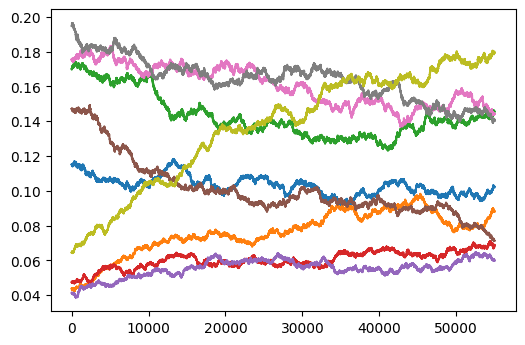

D - linkage disequilibrium


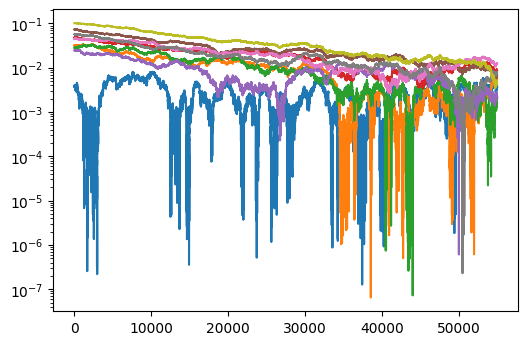

rho - absoulte error to true value


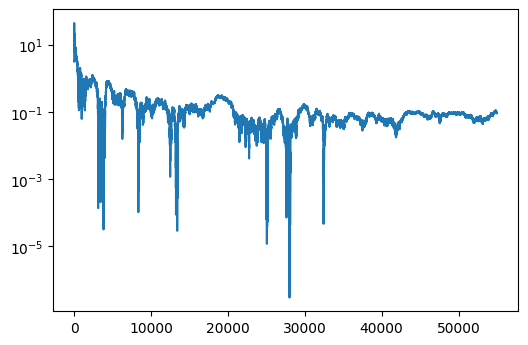

I - information


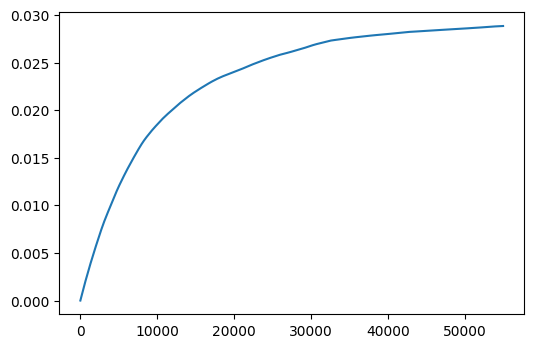

In [14]:
x, x_2 = simulate(x, x_2, T = 0.05, t = 0, delta = math.pow(10,-5))